In [1]:
# Analysis of blood pressure data
# The bpdata.csv dataset contains diastolic and systolic blood pressure measurements for 1000 individuals, 
# and genotype data for 11 SNPs in a candidate gene for blood pressure. Covariates such as gender (sex) and 
# body mass index (bmi) are included as well. 
bpdata=read.csv("~/code/biom262-2016/weeks/week09/bpdata.csv",header=TRUE)
head(bpdata)
table(bpdata$snp3)

,X,sex,sbp,dbp,snp1,snp2,snp3,snp4,snp5,snp6,snp7,snp8,snp9,snp10,snp11,bmi
1,1,FEMALE,171,89,CC,TT,TT,TT,CC,GG,AA,TT,TT,CC,TT,25
2,2,MALE,160,99,TT,TT,CC,NA,CC,AG,AT,CC,CT,CC,CT,35
3,3,FEMALE,142,83,CT,TT,TC,CT,CC,AG,TT,CC,TT,CT,TT,34
4,4,MALE,126,71,CT,TT,CC,NA,CC,AA,TT,CC,TT,CT,CT,32
5,5,FEMALE,126,82,CT,TT,CC,CC,CC,AA,TT,CC,TT,CT,CT,34
6,6,FEMALE,132,89,CT,TT,CC,CC,CC,NA,TT,CC,TT,TT,CT,25



 CC  TC  TT 
621 304  35 

,X,sex,sbp,dbp,snp1,snp2,snp3,snp4,snp5,snp6,snp7,snp8,snp9,snp10,snp11,bmi,n.minor
1,1,FEMALE,171,89,CC,TT,TT,TT,CC,GG,AA,TT,TT,CC,TT,25,2
2,2,MALE,160,99,TT,TT,CC,NA,CC,AG,AT,CC,CT,CC,CT,35,0
3,3,FEMALE,142,83,CT,TT,TC,CT,CC,AG,TT,CC,TT,CT,TT,34,1
4,4,MALE,126,71,CT,TT,CC,NA,CC,AA,TT,CC,TT,CT,CT,32,0
5,5,FEMALE,126,82,CT,TT,CC,CC,CC,AA,TT,CC,TT,CT,CT,34,0
6,6,FEMALE,132,89,CT,TT,CC,CC,CC,NA,TT,CC,TT,TT,CT,25,0


,2.5 %,97.5 %
(Intercept),139.0030,141.8328
n.minor,0.4750661,4.6362049



Call:
lm(formula = sbp ~ n.minor, data = bpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.974 -12.418  -0.974  10.582  60.582 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 140.4179     0.7219 194.506   <2e-16 ***
n.minor       2.5556     1.0615   2.407   0.0163 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.33 on 958 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.006014,	Adjusted R-squared:  0.004976 
F-statistic: 5.796 on 1 and 958 DF,  p-value: 0.01625


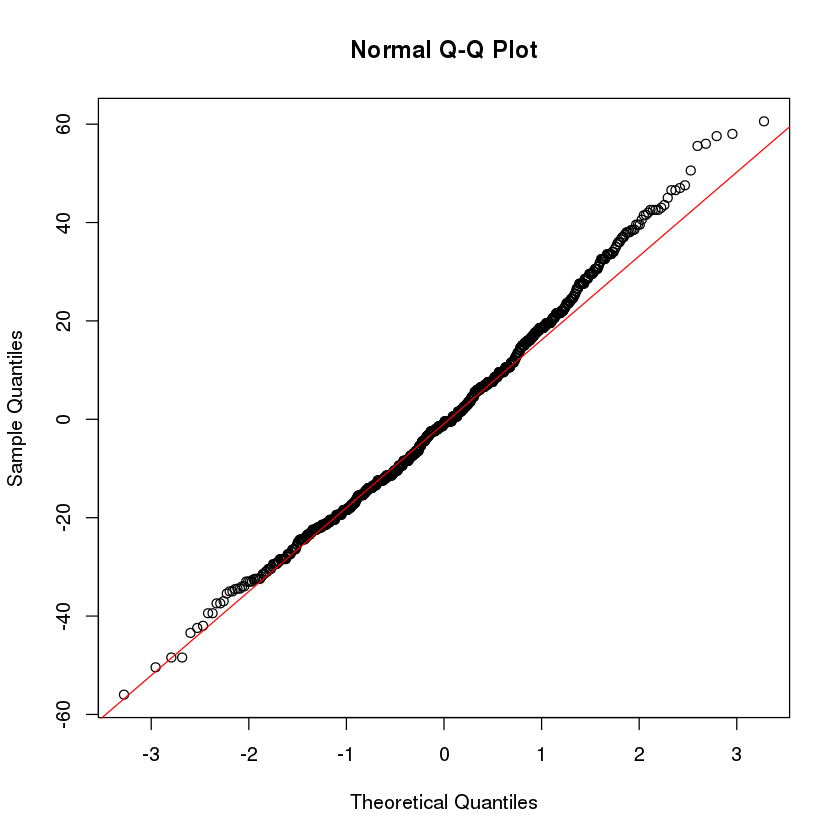

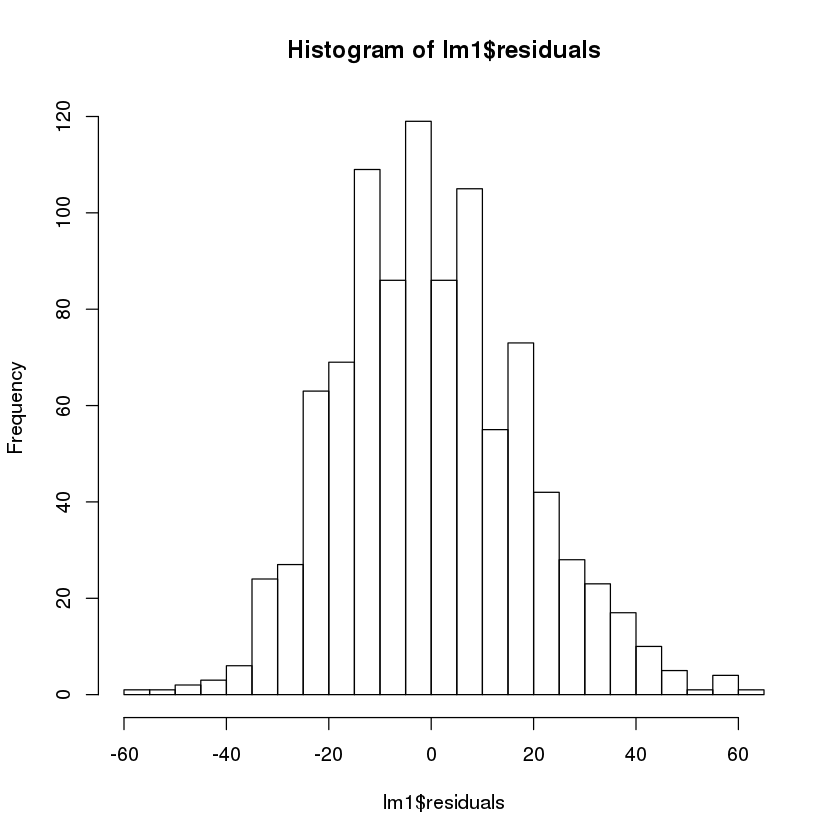

In [2]:
# Exercise 1: linear regression different models
# Perform a linear regression in R of systolic blood pressure (sbp) on SNP3
# using lm(). Compare the estimates, intervals and p-values you get using:
# additive (linear) model 
# dominant model 
# recessive model
# 2 parameter (genotypic) model

# Additive model
bpdata$n.minor <- (bpdata$snp3=="TC") + 2*(bpdata$snp3=="TT")
head(bpdata)
lm1 = lm(sbp~n.minor, data=bpdata)

# Obtain a confidence interval for the linear regression paramaters
confint.default(lm1)
summary(lm1)
qqnorm(lm1$residuals)
qqline(lm1$residuals,col="red")
hist(lm1$residuals, breaks=20)

       snp3
domvar   CC  TC  TT
  FALSE 621   0   0
  TRUE    0 304  35

,2.5 %,97.5 %
(Intercept),138.9858,141.8709
domvarTRUE,0.3624521,5.2174433



Call:
lm(formula = sbp ~ domvar, data = bpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.218 -12.428  -0.823  10.572  60.572 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  140.428      0.736 190.801   <2e-16 ***
domvarTRUE     2.790      1.238   2.253   0.0245 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.34 on 958 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.005269,	Adjusted R-squared:  0.00423 
F-statistic: 5.074 on 1 and 958 DF,  p-value: 0.02451


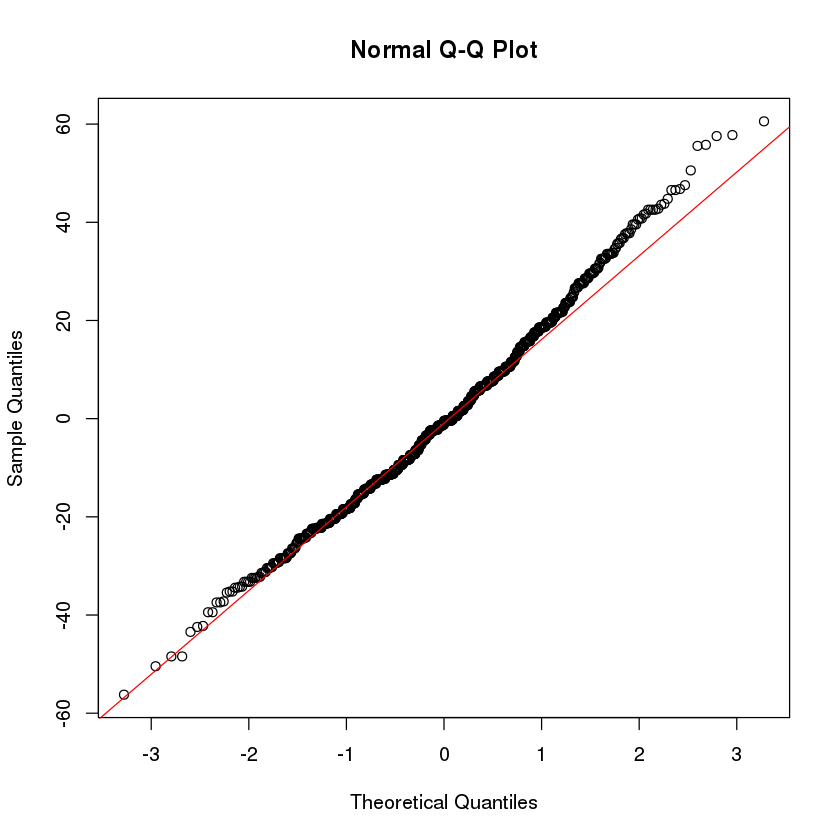

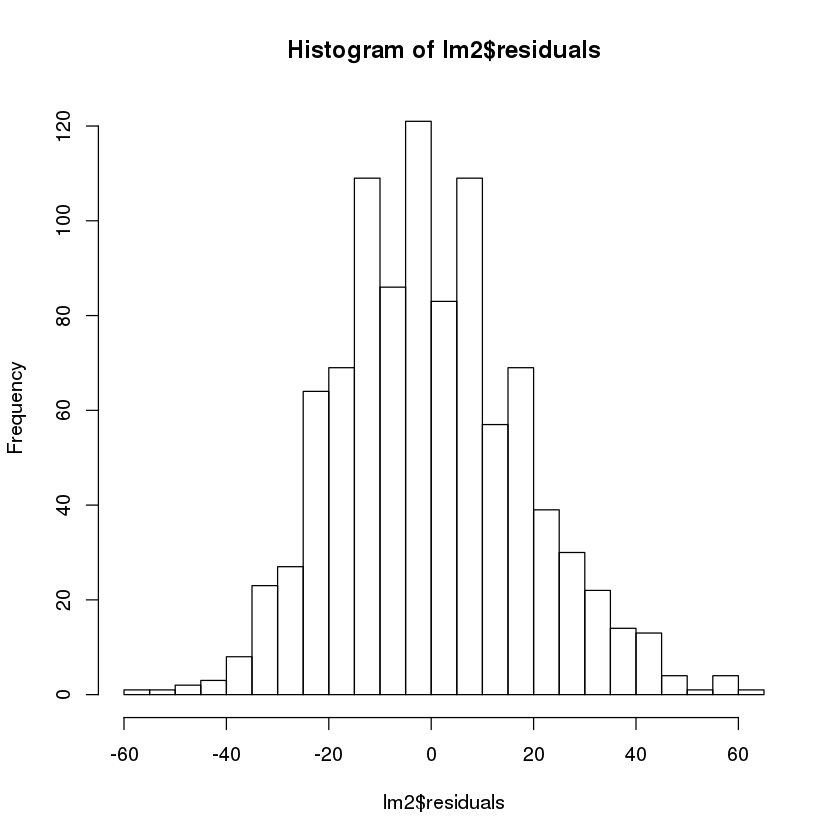

In [3]:
# Dominant effect of T
bpdata$domvar <- (bpdata$snp3=="TC") | (bpdata$snp3=="TT")
with(bpdata, table(domvar, snp3))

lm2 <- lm(sbp~domvar, data=bpdata)
confint.default(lm2)
summary(lm2)

qqnorm(lm2$residuals)
qqline(lm2$residuals,col="red")
hist(lm2$residuals, breaks=20)

In [4]:
# Recessive model and two-degree of freedom model (genotypic model)
bpdata$recvar <- (bpdata$snp3=="TT")
with(bpdata, table(recvar, snp3))

lm3 <- lm(sbp~recvar, data=bpdata)
confint.default(lm3)
summary(lm3)

lm4 <- lm(sbp~snp3, data=bpdata)
confint.default(lm4)
summary(lm4)

       snp3
recvar   CC  TC  TT
  FALSE 621 304   0
  TRUE    0   0  35

,2.5 %,97.5 %
(Intercept),140.0670,142.4347
recvarTRUE,-1.73658,10.66353



Call:
lm(formula = sbp ~ recvar, data = bpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.251 -12.501  -1.251  10.749  59.749 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  141.251      0.604 233.854   <2e-16 ***
recvarTRUE     4.463      3.163   1.411    0.159    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.37 on 958 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.002074,	Adjusted R-squared:  0.001032 
F-statistic: 1.991 on 1 and 958 DF,  p-value: 0.1586


,2.5 %,97.5 %
(Intercept),138.9856,141.8711
snp3TC,-0.01405184,5.01921118
snp3TT,-0.9600769,11.5319655



Call:
lm(formula = sbp ~ snp3, data = bpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.931 -12.428  -0.931  10.572  60.572 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 140.4283     0.7361 190.773   <2e-16 ***
snp3TC        2.5026     1.2840   1.949   0.0516 .  
snp3TT        5.2859     3.1868   1.659   0.0975 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.34 on 957 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.006019,	Adjusted R-squared:  0.003942 
F-statistic: 2.898 on 2 and 957 DF,  p-value: 0.05563


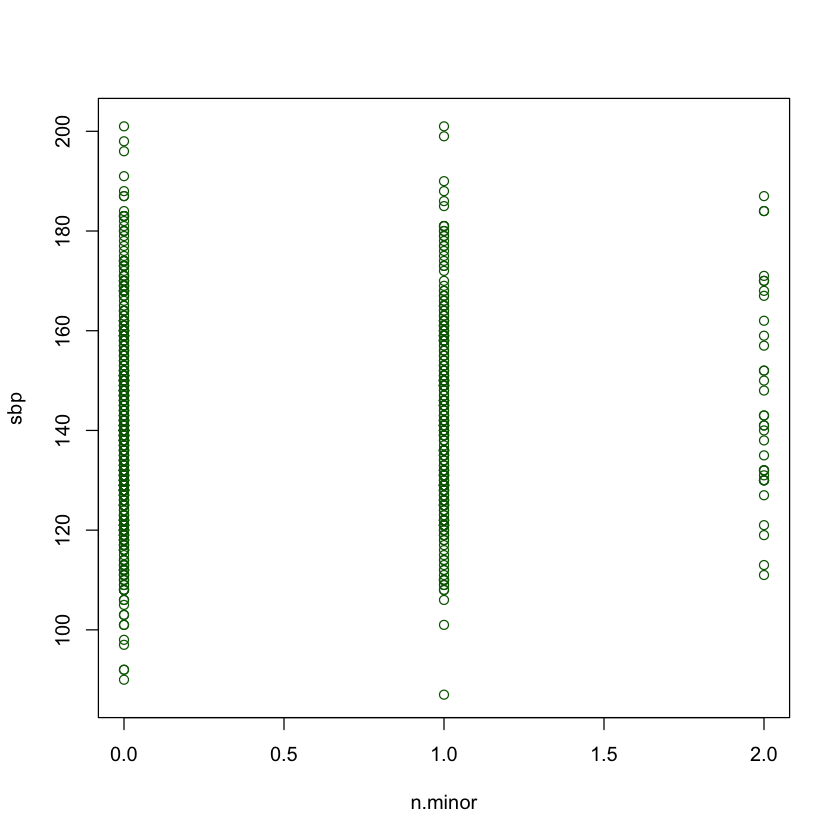

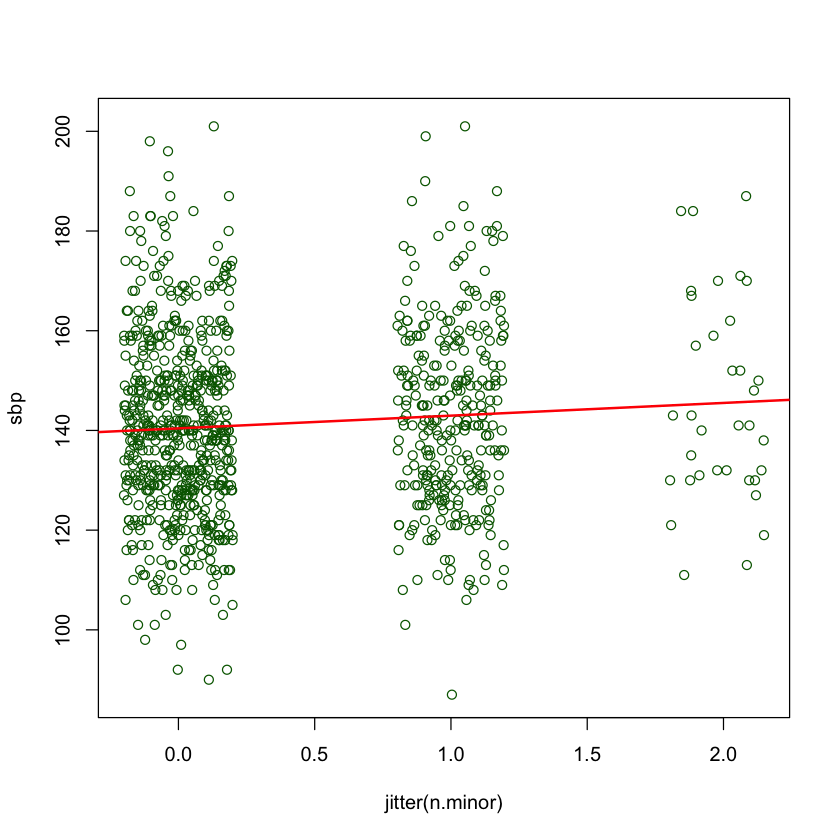

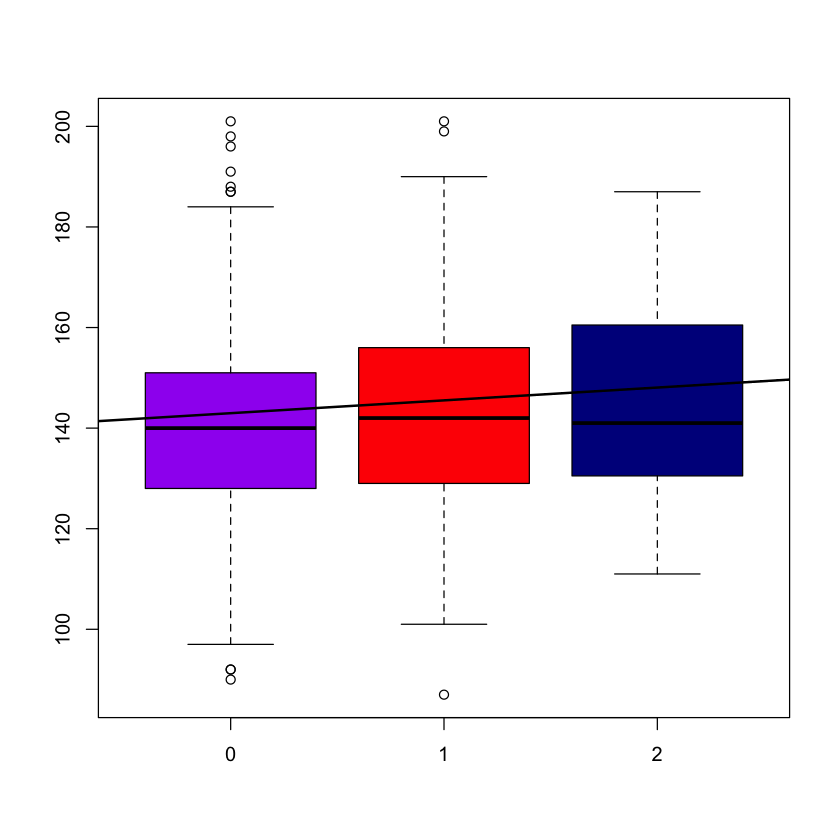

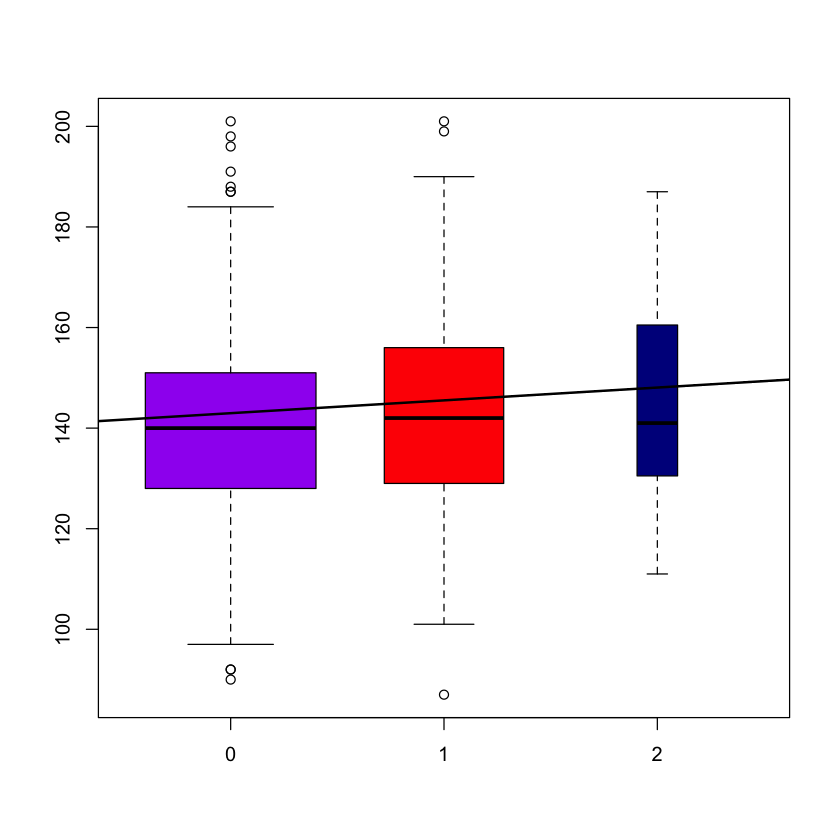

In [57]:
# Exercise 2: Provide plots illustrating the relationship between 
# sbp and the three genotypes at  SNP3
plot(sbp~n.minor, data=bpdata,col="darkgreen")

plot(sbp~jitter(n.minor), data=bpdata,col="darkgreen")
abline(lm1, col="red", lwd=2)

boxplot(sbp~n.minor,data=bpdata, col=c("purple","red","darkblue"))
abline(lm1, lwd=2)

boxplot(sbp~n.minor,data=bpdata, col=c("purple","red","darkblue"),varwidth=T)
abline(lm1, lwd=2)

In [5]:
# Exercise 3 - redo the linear regression analysis of sbp from question 2 
# for the additive model, but this time adjust for sex and bmi.   Do the results change?  
lm1adj = lm(sbp~n.minor+sex+bmi, data=bpdata)

#Get confidence intervals and summary data #
confint.default(lm1adj)
summary(lm1adj)

,2.5 %,97.5 %
(Intercept),139.9686,151.7390
n.minor,0.5691929,4.7021366
sexMALE,-7.081551,-2.470050
bmi,-0.28420373,0.08745441



Call:
lm(formula = sbp ~ n.minor + sex + bmi, data = bpdata)

Residuals:
   Min     1Q Median     3Q    Max 
-58.83 -12.81  -0.82  11.58  57.80 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 145.85380    3.00271  48.574  < 2e-16 ***
n.minor       2.63566    1.05434   2.500   0.0126 *  
sexMALE      -4.77580    1.17642  -4.060 5.32e-05 ***
bmi          -0.09837    0.09481  -1.038   0.2997    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.19 on 955 degrees of freedom
  (41 observations deleted due to missingness)
Multiple R-squared:  0.02402,	Adjusted R-squared:  0.02096 
F-statistic: 7.836 on 3 and 955 DF,  p-value: 3.608e-05


In [6]:
# Exercise 4 - What proportion of the variance in sbp is explained by all of the 11 SNPs together? 
# Perform a linear regression for additive model using all SNPs
ndf <- as.data.frame(bpdata[,c("sbp")])
colnames(ndf) <- "sbp"
summary(bpdata)

       X              sex           sbp             dbp           snp1    
 Min.   :   1.0   FEMALE:468   Min.   : 87.0   Min.   : 47.00   CC  :119  
 1st Qu.: 250.8   MALE  :532   1st Qu.:129.0   1st Qu.: 76.00   CT  :444  
 Median : 500.5                Median :140.0   Median : 82.00   TT  :425  
 Mean   : 500.5                Mean   :141.4   Mean   : 82.61   NA's: 12  
 3rd Qu.: 750.2                3rd Qu.:152.0   3rd Qu.: 90.00             
 Max.   :1000.0                Max.   :202.0   Max.   :117.00             
                                                                          
   snp2       snp3       snp4       snp5       snp6       snp7       snp8    
 AA  : 30   CC  :621   CC  :368   CC  :742   AA  :521   AA  : 85   CC  :678  
 AT  :285   TC  :304   CT  :421   CT  :162   AG  :335   AT  :381   CT  :271  
 TT  :663   TT  : 35   TT  :139   TT  : 12   GG  : 73   TT  :520   TT  : 35  
 NA's: 22   NA's: 40   NA's: 72   NA's: 84   NA's: 71   NA's: 14   NA's: 16  
          

In [7]:
# Convert to minor allele counts
ndf$snp1 <- (bpdata$snp1=="CT") + 2*(bpdata$snp1=="CC")
ndf$snp2 <- (bpdata$snp2=="AT") + 2*(bpdata$snp2=="AA")
ndf$snp3 <- (bpdata$snp3=="TC") + 2*(bpdata$snp3=="TT")
ndf$snp4 <- (bpdata$snp4=="CT") + 2*(bpdata$snp4=="TT")
ndf$snp5 <- (bpdata$snp5=="CT") + 2*(bpdata$snp5=="TT")
ndf$snp6 <- (bpdata$snp6=="AG") + 2*(bpdata$snp6=="GG")
ndf$snp7 <- (bpdata$snp7=="AT") + 2*(bpdata$snp7=="AA")
ndf$snp8 <- (bpdata$snp8=="CT") + 2*(bpdata$snp8=="TT")
ndf$snp9 <- (bpdata$snp9=="CT") + 2*(bpdata$snp9=="CC")
ndf$snp10 <- (bpdata$snp10=="CT") + 2*(bpdata$snp10=="TT")
ndf$snp11 <- (bpdata$snp11=="CT") + 2*(bpdata$snp11=="CC")
summary(ndf)

      sbp             snp1             snp2             snp3       
 Min.   : 87.0   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:129.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :140.0   Median :1.0000   Median :0.0000   Median :0.0000  
 Mean   :141.4   Mean   :0.6903   Mean   :0.3528   Mean   :0.3896  
 3rd Qu.:152.0   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :202.0   Max.   :2.0000   Max.   :2.0000   Max.   :2.0000  
                 NA's   :12       NA's   :22       NA's   :40      
      snp4             snp5             snp6             snp7       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.7532   Mean   :0.2031   Mean   :0.5178   Mean   :0.5588  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :2.0000   Max.   :2.0000   Max.   

In [8]:
lmall <- lm(sbp~snp1+snp2+snp3+snp4+snp5+snp6+snp7+snp8+snp9+snp10+snp11,data=ndf)
summary(lmall)


Call:
lm(formula = sbp ~ snp1 + snp2 + snp3 + snp4 + snp5 + snp6 + 
    snp7 + snp8 + snp9 + snp10 + snp11, data = ndf)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.638 -12.849  -0.522  11.032  61.683 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 140.20416    1.59651  87.819   <2e-16 ***
snp1         -1.88456    4.03838  -0.467    0.641    
snp2          1.95639    2.96674   0.659    0.510    
snp3          4.60730    4.65652   0.989    0.323    
snp4          0.05946    3.11138   0.019    0.985    
snp5         -0.26494    2.58719  -0.102    0.918    
snp6         -1.17284    1.80185  -0.651    0.515    
snp7          0.28939    1.78362   0.162    0.871    
snp8          0.70702    2.78030   0.254    0.799    
snp9         -2.17197    2.54774  -0.853    0.394    
snp10         0.60685    1.01229   0.599    0.549    
snp11         0.39009    4.15347   0.094    0.925    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [62]:
lmall <- lm(sbp~.,data=ndf)
summary(lmall)


Call:
lm(formula = sbp ~ ., data = ndf)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.638 -12.849  -0.522  11.032  61.683 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 140.20416    1.59651  87.819   <2e-16 ***
snp1         -1.88456    4.03838  -0.467    0.641    
snp2          1.95639    2.96674   0.659    0.510    
snp3          4.60730    4.65652   0.989    0.323    
snp4          0.05946    3.11138   0.019    0.985    
snp5         -0.26494    2.58719  -0.102    0.918    
snp6         -1.17284    1.80185  -0.651    0.515    
snp7          0.28939    1.78362   0.162    0.871    
snp8          0.70702    2.78030   0.254    0.799    
snp9         -2.17197    2.54774  -0.853    0.394    
snp10         0.60685    1.01229   0.599    0.549    
snp11         0.39009    4.15347   0.094    0.925    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.17 on 718 degrees of freedom
  (270 observations del